In [1]:
from neuralprophet import NeuralProphet

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import pickle

In [3]:
df=pd.read_csv(r"C:\Users\Amey\PycharmProjects\weather forecasting\wdata\Temperature_And_Precipitation_Cities_IN\Delhi_NCR_1990_2022_Safdarjung.csv")

In [4]:
df['time'] = pd.to_datetime(df['time'], format='%d-%m-%Y')

In [5]:
df.dtypes

time    datetime64[ns]
tavg           float64
tmin           float64
tmax           float64
prcp           float64
dtype: object

In [6]:
df.head()

,time,tavg,tmin,tmax,prcp
0,1990-01-01,9.4,6.0,15.1,0.0
1,1990-01-02,9.3,5.2,14.2,0.0
2,1990-01-03,9.0,6.5,13.6,0.0
3,1990-01-04,10.7,6.0,17.5,0.0
4,1990-01-05,12.6,7.3,20.8,0.0


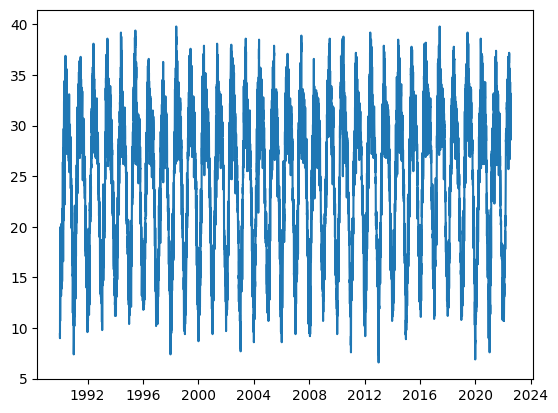

In [7]:
plt.plot(df['time'],df['tavg'])

In [8]:
data=df[['time','tavg']]
data.dropna(inplace=True)
data.columns=['ds','y']
data.head()

WARNING - (py.warnings._showwarnmsg) - C:\Users\Amey\AppData\Local\Temp\ipykernel_34480\1855940670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)



,ds,y
0,1990-01-01,9.4
1,1990-01-02,9.3
2,1990-01-03,9.0
3,1990-01-04,10.7
4,1990-01-05,12.6


In [9]:
import torch


device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [10]:
model=NeuralProphet()  #untrained neuralprophet model
model.fit(data,freq='D',epochs=1000)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.398% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (185) is too small than the required number                     for the learning rate finder (251). The results might not be optimal.


Finding best initial lr:   0%|          | 0/251 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,28.103531,34.155796,0.421241,0.0,0
1,24.935583,30.354597,0.348948,0.0,1
2,22.040371,26.904234,0.284822,0.0,2
3,19.435001,23.770519,0.228651,0.0,3
4,17.005579,20.838985,0.179188,0.0,4
...,...,...,...,...,...
995,1.727863,2.182718,0.002243,0.0,995
996,1.726657,2.180928,0.002240,0.0,996
997,1.725893,2.181264,0.002239,0.0,997
998,1.725120,2.179148,0.002237,0.0,998


In [11]:
future=model.make_future_dataframe(data,periods=900)
forecast=model.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.398% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 185it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2022-07-26,None,31.062580,25.483517,5.577227,0.001834
1,2022-07-27,None,31.061073,25.483526,5.543799,0.033747
2,2022-07-28,None,31.019567,25.483532,5.512046,0.023988
3,2022-07-29,None,30.968275,25.483541,5.481791,0.002944
4,2022-07-30,None,30.919071,25.483547,5.452971,-0.017446


In [12]:
plot1=model.plot(forecast)

In [13]:
plot1

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': 'c1cc1aad-9ea0-4e35-8282-257b75727c55',
              'x': array([datetime.datetime(2022, 7, 26, 0, 0),
                          datetime.datetime(2022, 7, 27, 0, 0),
                          datetime.datetime(2022, 7, 28, 0, 0), ...,
                          datetime.datetime(2025, 1, 8, 0, 0),
                          datetime.datetime(2025, 1, 9, 0, 0),
                          datetime.datetime(2025, 1, 10, 0, 0)], dtype=object),
              'y': array([31.06258 , 31.061073, 31.019567, ..., 13.060467, 13.069721, 13.0772  ],
                         dtype=float32)},
             {'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'uid': '

In [14]:
with open('delhi_avg_model.pkl','wb') as f:
    pickle.dump(model,f)

In [15]:
model